<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Calculations-and-adding-results-to-the-table." data-toc-modified-id="Calculations-and-adding-results-to-the-table.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculations and adding results to the table.</a></span><ul class="toc-item"><li><span><a href="#Price-per-square-meter." data-toc-modified-id="Price-per-square-meter.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Price per square meter.</a></span></li><li><span><a href="#Day-of-the-week,-month,-and-year-of-the-listing-publication." data-toc-modified-id="Day-of-the-week,-month,-and-year-of-the-listing-publication.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Day of the week, month, and year of the listing publication.</a></span></li><li><span><a href="#Apartment-floor-level:-options---ground,-top,-other." data-toc-modified-id="Apartment-floor-level:-options---ground,-top,-other.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Apartment floor level: options - ground, top, other.</a></span></li><li><span><a href="#Ratio-of-living-area-to-total-area,-as-well-as-the-ratio-of-kitchen-area-to-total-area." data-toc-modified-id="Ratio-of-living-area-to-total-area,-as-well-as-the-ratio-of-kitchen-area-to-total-area.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ratio of living area to total area, as well as the ratio of kitchen area to total area.</a></span></li><li><span><a href="#Let's-examine-the-following-parameters:-area,-price,-number-of-rooms,-and-ceiling-height.-We-will-create-histograms-for-each-parameter." data-toc-modified-id="Let's-examine-the-following-parameters:-area,-price,-number-of-rooms,-and-ceiling-height.-We-will-create-histograms-for-each-parameter.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Let's examine the following parameters: area, price, number of rooms, and ceiling height. We will create histograms for each parameter.</a></span></li><li><span><a href="#Time-taken-to-sell-an-apartment." data-toc-modified-id="Time-taken-to-sell-an-apartment.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Time taken to sell an apartment.</a></span></li><li><span><a href="#Removing-rare-and-outlier-values." data-toc-modified-id="Removing-rare-and-outlier-values.-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Removing rare and outlier values.</a></span></li><li><span><a href="#Correlation-of-apartment-price-with-various-factors." data-toc-modified-id="Correlation-of-apartment-price-with-various-factors.-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Correlation of apartment price with various factors.</a></span></li><li><span><a href="#The-most-significant-locations" data-toc-modified-id="The-most-significant-locations-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>The most significant locations</a></span></li><li><span><a href="#Distance-from-the-city-center." data-toc-modified-id="Distance-from-the-city-center.-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Distance from the city center.</a></span></li><li><span><a href="#Analysis-of-apartments-in-the-city-center." data-toc-modified-id="Analysis-of-apartments-in-the-city-center.-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Analysis of apartments in the city center.</a></span></li></ul></li><li><span><a href="#Overall-conclusion" data-toc-modified-id="Overall-conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Overall conclusion</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Analyzing Real Estate Market
We have access to data from the Yandex Real Estate service - an archive of apartment sale listings in St. Petersburg and neighboring areas. over several years. The goal is to learn how to determine the market value of real estate properties. Our task is to establish parameters. This will enable us to build an automated system that will detect anomalies and fraudulent activities.

To solve the given task, we will take the following steps:

Analyze gaps and anomalies in the data.
Construct a correlation matrix between price and various factors.
Examine differences in price and correlation matrix across different segments - apartments in the city center and all apartments in general.


In the end, we should understand which factors the price depends on and which factors it doesn't depend on, as well as gather general information about apartment prices in St. Petersburg and neighboring areas.

## Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv')
print(data.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

And here's the first issue. The data merged into a single row instead of being split into columns. Let's read the file, specifying the tab character \t as the delimiter. The parameter "sep" is responsible for column separation.


In [3]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The table consists of 21 columns, with a total of 23699 rows. Each row represents an apartment sale listing. The columns contain various characteristics of the apartment, such as distance to the nearest airport, nearby parks, apartment area, ceiling height, number of balconies, etc. There are a total of 21 characteristics. Out of the 21 columns, 8 columns are completely filled for all listings. The remaining columns contain missing data.

Let's calculate the proportion of missing values in each column.

In [6]:
data.isnull().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

There is a significant proportion of missing values in the 'is apartment' column, which is 85%. However, this information will not impact our analysis going forward, so there is no need to fill in these missing values.

Other columns with missing values are listed below.

balcony                   0.477404  
locality_name             0.001232  
airports_nearest          0.182852  
cityCenters_nearest       0.181336  
parks_around3000          0.181241  
parks_nearest             0.624254  
ponds_around3000          0.181241  
ponds_nearest             0.578873  
days_exposition           0.162577  
living_area_ratio         0.051824  
kitchen_area_ratio        0.064519  
cityCenters_nearest_km    0.181336  

I believe that the missing values in these columns are not critical for further analysis. If we fill them in, we might distort the information even more. Therefore, let's leave them as they are.

## Calculations and adding results to the table.

Our task is to learn how to determine the market value of real estate properties. To do this, we need to analyze the dependency of apartment prices on various factors (whether the price depends on the area, number of rooms, distance from the center, floor level - first, last, other).

Let's calculate and add to the table: price per square meter, day of the week, month, and year of the listing publication, apartment floor level (first, last, other), ratio of living area to total area, as well as the ratio of kitchen area to total area.

### Price per square meter.

Let's find the price per square meter by dividing the price by the total area, and then add the corresponding column named "price_per_meter."

In [7]:
data['price_per_meter']=data['last_price']/data['total_area']

In [8]:
data['price_per_meter'].min()

111.8348623853211

In [9]:
data['price_per_meter'].max()

1907500.0

### Day of the week, month, and year of the listing publication.

In [10]:
print(data['first_day_exposition'])

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object


In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [12]:
data['week_day'] = data['first_day_exposition'].dt.day_name()

In [13]:
data['month'] = data['first_day_exposition'].dt.month

In [14]:
data['year'] = data['first_day_exposition'].dt.year

### Apartment floor level: options - ground, top, other.

In [15]:
def floor_group(row):
    a=row['floor']
    b=row['floors_total']
    if a==1:
        return 'ground'
    elif a == b:
        return 'top'
    return 'other'





Let's check if the function works. To do this, we will create two lists: one with row values and another with column names. We will create a row and pass it as an argument to the function:

In [16]:
row_values=[3,5]
row_columns=['floor', 'floors_total']
row=pd.Series(data=row_values, index=row_columns)
floor_group(row)

'other'

In [17]:
row_values=[1,5]
row_columns=['floor', 'floors_total']
row=pd.Series(data=row_values, index=row_columns)
floor_group(row)

'ground'

In [18]:
row_values=[5,5]
row_columns=['floor', 'floors_total']
row=pd.Series(data=row_values, index=row_columns)
floor_group(row)

'top'

The function works correctly. Let's create a column named 'floor_group' with values from the function floor_group.

In [19]:
data['floor_group']=data.apply(floor_group, axis=1)

Let's verify the result of the function's work.

In [20]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             0  64900000.0       159.0           2015-07-24      3   
4             2  10000000.0       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0          482.0               2.0          7

The 'floor_group' column has been successfully added.

### Ratio of living area to total area, as well as the ratio of kitchen area to total area.

Let's add a column for the ratio of living area to total area data['living_area_ratio']

In [21]:
data['living_area_ratio']=data['living_area']/data['total_area']

In [22]:
data['living_area_ratio'].describe()

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
Name: living_area_ratio, dtype: float64

Let's add a column for the ratio of kitchen area to total area: data['kitchen_area_ratio'].

In [23]:
data['kitchen_area_ratio']=data['kitchen_area']/data['total_area']

In [24]:
print (data['kitchen_area_ratio'])

0        0.231481
1        0.272277
2        0.148214
3             NaN
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696         NaN
23697    0.303583
23698    0.278638
Name: kitchen_area_ratio, Length: 23699, dtype: float64


### Let's examine the following parameters: area, price, number of rooms, and ceiling height. We will create histograms for each parameter.

In [25]:
print(data['total_area'])

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64


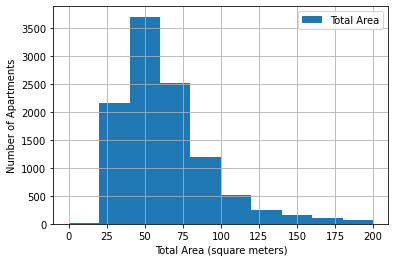

In [78]:
import matplotlib.pyplot as plt

data['total_area'].hist(range=(0, 200))
plt.xlabel('Total Area (square meters)')
plt.ylabel('Number of Apartments')
plt.legend(['Total Area'])
plt.show()

We can observe that the majority of apartments have an area of around 50 square meters. There are also a significant number of apartments with areas ranging from 25 to 75 square meters. The remaining values appear to be exceptions.

Let's validate our observation using the describe method.

In [27]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Indeed, up to 75% of all apartments have a total area of 69 square meters or less. The median is 52 square meters, and the average area of the sold apartments is 60 square meters. The standard deviation is approximately ±35 square meters.


In [28]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [84]:
data['last_price']=data['last_price']/1000000

In [86]:
data['last_price'].describe()

count    1.067600e+04
mean     7.043075e-12
std      7.544978e-12
min      1.219000e-14
25%      3.850000e-12
50%      5.300000e-12
75%      7.900000e-12
max      3.300000e-10
Name: last_price, dtype: float64

The price column does not have missing data, which indicates that the values are quite reliable. We can see that the median price is 4.65 million rubles. The majority of apartments are priced between 3 and 5 million rubles, with a peak around 4 million rubles.

In [32]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

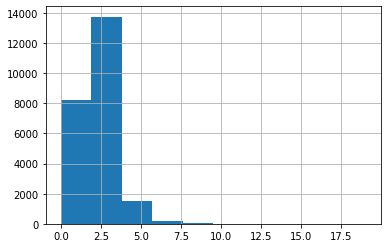

In [33]:
data['rooms'].hist()

The average number of rooms is 2 rooms. 50% of the apartments being sold have 2 rooms.

In [34]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

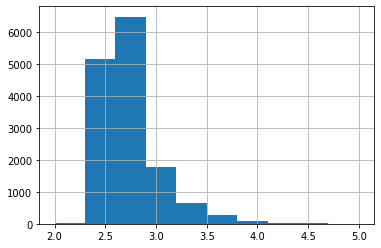

In [35]:
data['ceiling_height'].hist(range=(2,5))

Ceiling height is specified in only a portion of the listings - 14500 out of 23400. From the provided data, it can be observed that the majority of apartments have a ceiling height of 2.6 meters. The average ceiling height is 2.7 meters, but this average is heavily skewed by the maximum values. The median ceiling height is 2.65 meters.

### Time taken to sell an apartment.

Let's examine the time it takes to sell an apartment in the 'days_exposition' column.

In [36]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

The average time for a sale is 180 days. The median value is 95 days. Such a difference is due to a large number of values significantly exceeding the average. 25% of values lie within the range up to 45 days, while another 25% lie in the range greater than 232 days. This means that if a sale took more than 232 days, it can be considered a very long sale. If a sale took place within 45 days, it can be considered a very quick sale. Let's create a graph to visualize this.

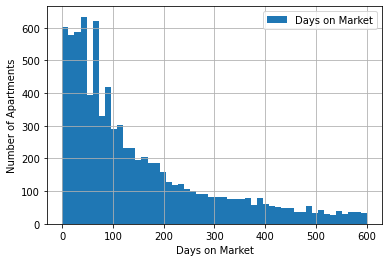

In [90]:
data['days_exposition'].hist(range=(0, 600), bins=50)
plt.xlabel('Days on Market')
plt.ylabel('Number of Apartments')
plt.legend(['Days on Market'])
plt.show()

As seen from the graph, the majority of apartments are sold within the period of 0 to 200 days. By adding the parameter range=(0,300) to the histogram, you can focus in detail on the sales period from 0 to 300 days.

<AxesSubplot:>

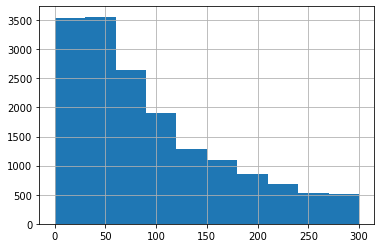

In [38]:
data['days_exposition'].hist(range=(0,300))

After a more detailed examination of the graph, it's evident that the majority of apartments are sold within a period of up to 60 days.

### Removing rare and outlier values.

Let's remove rare values for the 'total_area' column. From the histogram, it's apparent that when values are above 200 square meters, the histogram merges with zero.

In [39]:
data=data.query('total_area<200')

In [40]:
data['total_area'].describe()

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64

Отбросим редкие значения для столбца last_price. Из гистограммы видно, что при значениях более 30 млн. руб.гистрограмма сливается с нулем.  

In [41]:
data['last_price'].describe()

count    23468.000000
mean         6.022580
std          6.226899
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

Let's get rid of the scientific notation and convert the values in the 'last_price' column from rubles to million rubles.

In [42]:
data['last_price']=data['last_price']/1000000

In [43]:
data=data.query('last_price<30')

In [44]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,week_day,month,year,floor_group,living_area_ratio,kitchen_area_ratio
0,20,0.000013,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120370.370370,Thursday,3,2019,other,0.472222,0.231481
1,7,0.000003,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82920.792079,Tuesday,12,2018,ground,0.460396,0.272277
2,10,0.000005,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92785.714286,Thursday,8,2015,other,0.612500,0.148214
3,0,0.000065,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,Friday,7,2015,other,NaN,NaN
4,2,0.000010,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000.000000,Tuesday,6,2018,other,0.320000,0.410000


Let's remove rare values for the 'ceiling_height' column. From the histogram, it's apparent that when values are above 4 meters and below 2.3 meters, the histogram merges with zero.

In [45]:
data=data.query('2.5<ceiling_height<4')

In [46]:
data['ceiling_height'].describe()

count    10676.000000
mean         2.784797
std          0.240477
min          2.510000
25%          2.600000
50%          2.700000
75%          2.872500
max          3.980000
Name: ceiling_height, dtype: float64

### Correlation of apartment price with various factors.

Let's calculate the Pearson correlation coefficient. The closer the value of the Pearson coefficient is to 1, the stronger the dependency.

We will build a correlation matrix for the parameters 'last_price', 'total_area', 'rooms', 'cityCenters_nearest'.

In [47]:
price_factors=data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

In [48]:
print(price_factors)

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.626295  0.380504            -0.258155
total_area             0.626295    1.000000  0.809007            -0.246887
rooms                  0.380504    0.809007  1.000000            -0.200957
cityCenters_nearest   -0.258155   -0.246887 -0.200957             1.000000


We can observe that the price is highly correlated with the total area (Pearson coefficient is 0.62). The price is slightly dependent on the number of rooms (Pearson coefficient is 0.38), and there is a negative correlation with the distance from the city center (Pearson coefficient is -0.25).

Lets visualize this using sns.pairplot().  

In [49]:
import seaborn as sns

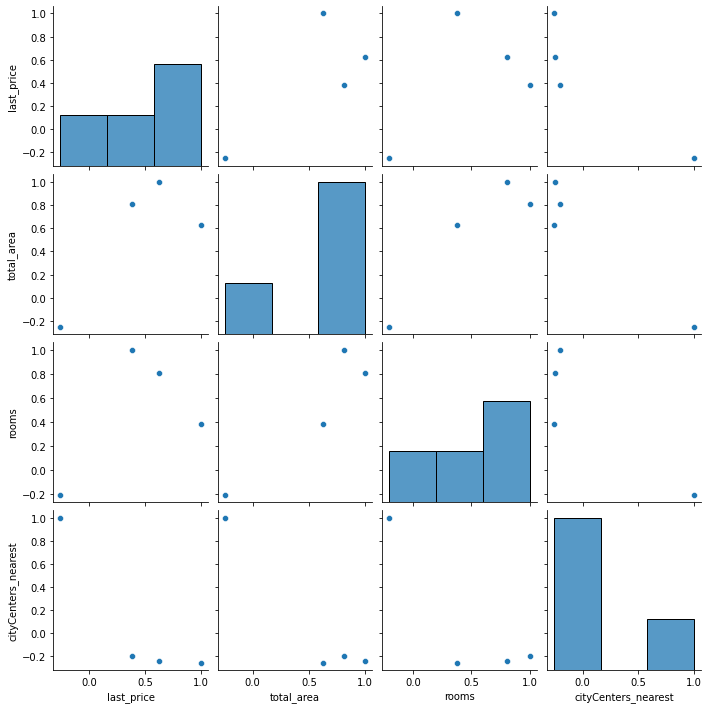

In [50]:
sns.pairplot(price_factors)

The graph illustrates how the price increases with the growth of area and the number of rooms. Additionally, as the distance from the city center decreases, the price tends to rise.

Let's analyze the relationship between price and other factors such as floor level (first, last, other) and the listing date.

In [51]:
data_weekdays=data.pivot_table(index='week_day', values='last_price', aggfunc=['mean'])

<AxesSubplot:xlabel='week_day'>

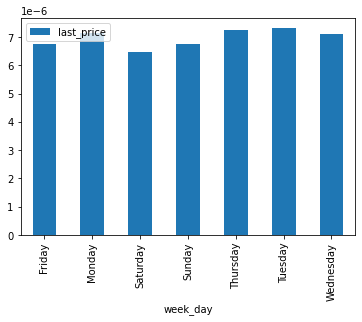

In [52]:
data_weekdays.plot(y='mean', kind='bar')

In [53]:
data_month=data.pivot_table(index='month', values='last_price', aggfunc=['mean'])

<AxesSubplot:xlabel='month'>

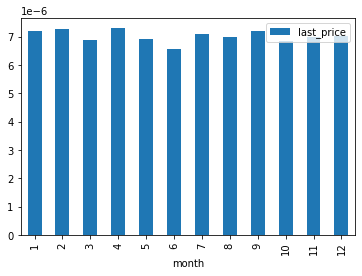

In [54]:
data_month.plot(y='mean', kind='bar')

In [55]:
data_floor_group=data.pivot_table(index='floor_group', values='last_price', aggfunc=['mean'])

From the above graphs, it's evident that neither the day of the week nor the month significantly influence the average price. The price appears to be roughly consistent across months and days.

<AxesSubplot:xlabel='floor_group'>

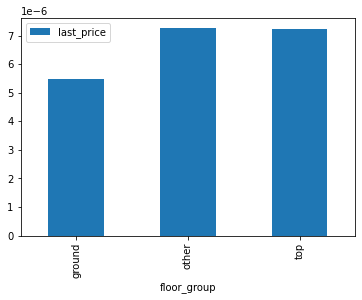

In [56]:
data_floor_group.plot(y='mean', kind='bar')

From the graph, it's apparent that the average price is slightly lower (around 15%) on the first floor, and it's roughly similar on other and last floors.

In [57]:
data_year=data.pivot_table(index='year', values='last_price', aggfunc=['mean'])

<AxesSubplot:xlabel='year'>

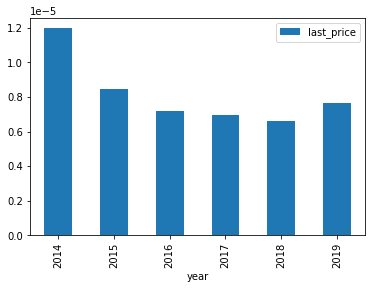

In [58]:
data_year.plot(y='mean', kind='bar')

The graph shows that the average price was the highest in 2014. Afterward, there was a sharp drop (around 30%), and since 2014, the price has remained relatively stable without significant changes.

### The most significant locations

Lets choose locations with the greatest amount of apartments

In [59]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'посёлок Мурино', 'Сертолово',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Ломоносов', 'Кингисепп', 'Сестрорецк', 'деревня Куттузи',
       'поселок Торковичи', 'поселок Первомайское', 'посёлок Понтонный',
       'деревня Старая', 'деревня Лесколово', 'Колпино', 'Красное Село',
       'село Путилово', 'Волхов', 'посёлок Шушары', 'Никольское',
       'Зеленогорск', 'деревня Кальтино', 'Кудрово', 'Луга', 'Ивангород',
       'посёлок городского типа Красный Бор', 'поселок Бугры',
       'посёлок Металлострой', 'посёлок Победа',
       'поселок городского типа Синявино', 'Тосно', 'Волосово',
       'поселок Романовка', 'посёлок Александровская',
       'деревня Лопухинка', 'поселок городского типа Советский',
       'Гатчина', 'посёлок Петровское', '

In [60]:
top_10_locations=data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])

In [61]:
top_10_locations.columns=['count', 'mean']

In [62]:
top_10_locations.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,7758,118092.684655
Всеволожск,238,67741.531686
посёлок Мурино,190,87214.191278
посёлок Шушары,188,79621.179831
Пушкин,152,106921.364987
посёлок Парголово,122,90820.155316
деревня Кудрово,121,90719.183664
Сестрорецк,102,103284.104811
Петергоф,101,87587.391417


In [63]:
top_10_locations.sort_values(by='mean').head()

,count,mean
locality_name,,
деревня Вахнова Кара,1,11688.311688
поселок Совхозный,1,12555.555556
поселок городского типа Ефимовский,1,12686.567164
поселок Почап,1,16037.735849
посёлок городского типа Важины,1,16666.666667


The lowest average housing cost per square meter is in Vakhnova Kara at 19,230 rubles per square meter.

In [64]:
top_10_locations.sort_values(by='mean', ascending=False).head()

,count,mean
locality_name,,
Зеленогорск,14,120430.543524
Санкт-Петербург,7758,118092.684655
посёлок Репино,3,108075.728806
деревня Мистолово,3,107121.680644
Пушкин,152,106921.364987


The highest average housing cost per square meter is in Zelenogorsk at 120,430 rubles per square meter. Next is Saint Petersburg with 118,092 rubles per square meter.

### Distance from the city center.

In [65]:
data['cityCenters_nearest_km']=data['cityCenters_nearest']/1000

In [66]:
data['cityCenters_nearest_km']=data['cityCenters_nearest_km'].round()

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='price_per_meter'>

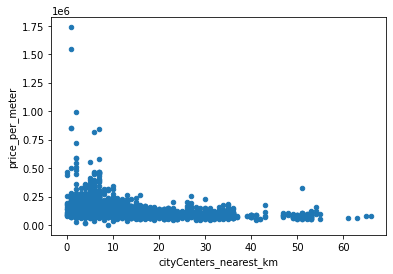

In [67]:
data.plot(x='cityCenters_nearest_km', y='price_per_meter', kind='scatter')

From the graph, it's evident that the greater the distance from the city center, the lower the price per square meter.

In [68]:
data['cityCenters_nearest_km'].describe()

count    8758.00000
mean       13.41208
std         8.47735
min         0.00000
25%         8.00000
50%        13.00000
75%        16.00000
max        66.00000
Name: cityCenters_nearest_km, dtype: float64

The distance to the city center - half of the values lie within the range up to 13 km, and 25% are within 8 km. Let's consider apartments in the center to be those located no more than 8 km from the center.

### Analysis of apartments in the city center.

In [69]:
flats_in_center=data.query('cityCenters_nearest_km<8')

In [70]:
flats_in_center_ratios=flats_in_center[['last_price', 'total_area', 'rooms', 'ceiling_height']].corr()

In [71]:
print(flats_in_center_ratios)

                last_price  total_area     rooms  ceiling_height
last_price        1.000000    0.511490  0.219910        0.129513
total_area        0.511490    1.000000  0.759198        0.269620
rooms             0.219910    0.759198  1.000000        0.236744
ceiling_height    0.129513    0.269620  0.236744        1.000000


We can observe that the price of apartments in the center is slightly less dependent on the area compared to the price of all apartments (center + outskirts), with a Pearson coefficient of 0.51 vs. 0.62. Additionally, the price of apartments in the center is slightly less dependent on the number of rooms compared to the price of all apartments, with a Pearson coefficient of 0.21 vs. 0.38. Moreover, the price of apartments in the center is almost independent of the ceiling height, with a Pearson coefficient of 0.12.






Let's examine the relationship between the price of apartments in the center and various factors using graphs:

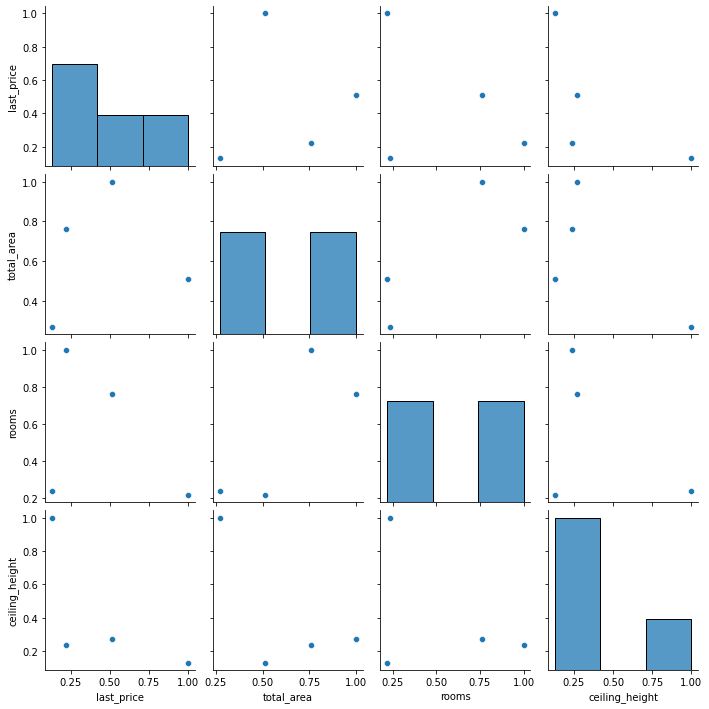

In [72]:
sns.pairplot(flats_in_center_ratios)

We can see that the points are scattered in a random order, indicating a lack of clear pattern. In other words, there is no observable relationship between the price and factors such as area, number of rooms, and ceiling height for apartments in the center.

In [73]:
flats_in_center_floor=flats_in_center.pivot_table(index='floor_group', values='last_price', aggfunc=['mean'])

<AxesSubplot:xlabel='floor_group'>

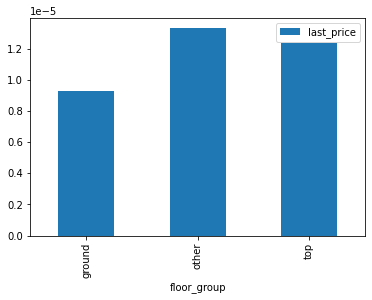

In [74]:
flats_in_center_floor.plot(y='mean', kind='bar')

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='price_per_meter'>

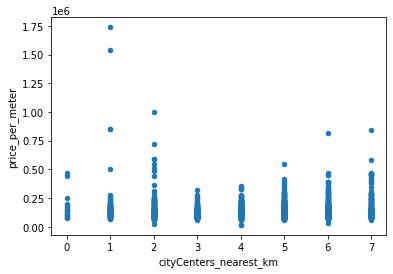

In [75]:
flats_in_center.plot(x='cityCenters_nearest_km', y='price_per_meter', kind='scatter')

In [76]:
flats_in_center_year=flats_in_center.pivot_table(index='year', values='last_price', aggfunc=['mean'])

<AxesSubplot:xlabel='year'>

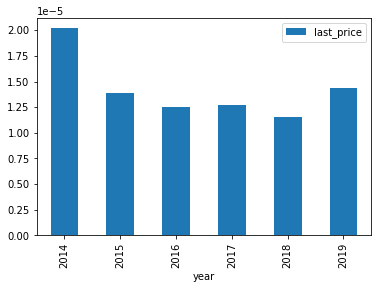

In [77]:
flats_in_center_year.plot(y='mean', kind='bar')

## Overall conclusion

We analyzed the data from the Yandex Real Estate service - an archive of apartment sale listings in Saint Petersburg and neighboring areas over several years to understand the relationship between apartment prices and various factors: distance from the center, floor level, ceiling height, apartment area, number of rooms, and other factors.

We began with initial data processing - analyzing the proportion of missing values in each column and considering the feasibility of filling them.

We also formatted the date column appropriately and extracted separate columns for the day of the week, month, and year of the listing date to later check whether the day, month, and year of the sale affect apartment prices.

Furthermore, we removed overly expensive apartments above 30 million rubles to prevent them from distorting the data.

To assess the dependency of price on different factors, we constructed a correlation matrix, calculated the Pearson coefficient, and visualized the dependencies using graphs.

We also separately constructed a similar correlation matrix for apartments in the city center. We determined apartments in the center using a graph where we plotted distance to the center on the X-axis and price per square meter on the Y-axis. Where the price significantly dropped per square meter, we established the center's boundary.

We separately analyzed the dependency of price on different factors in Saint Petersburg, as well as the 10 localities with the highest number of listings.

Here are the main conclusions from our analysis:

75% of apartments have a total area up to 69 square meters. The median is 52 square meters, and the average area of sold apartments is 60 square meters, with a standard deviation of approximately ±35 square meters.

Most apartments cost between 3 and 5 million rubles, with the majority priced around 4 million rubles.

The ratio of living area to total area averages at 55%.

The average period for selling an apartment is 3 months according to the median.

Pearson correlation coefficient reflecting the dependency of price on various factors is as follows: 0.62 - dependency on area, 0.38 - dependency on the number of rooms, -0.25 - dependency on distance from the center.

The average price is slightly lower (around 15%) on the first floor and roughly similar on other and last floors.

Price does not depend on the day or month of sale. However, a noticeable decline in price is observed after 2014 (around 30%), and after that, the price remained relatively stable.

Saint Petersburg has the highest number of listings - 7,758. All other cities have significantly fewer listings. For instance, the city following Saint Petersburg is Vsevolozhsk with 238 listings.

The highest average housing cost per square meter is in Zelenogorsk at 120,430 rubles per square meter, followed by Saint Petersburg at 118,092 rubles per square meter.

The lowest average housing cost per square meter is in Vakhnova Kara at 19,230 rubles per square meter.

Price per square meter is dependent on distance from the center. This suggests a radius around the center with apartments at the highest prices. This radius is around 8 km. Beyond that, the price per square meter significantly decreases.

We separately analyzed apartment prices in the center and concluded that in this segment, prices are less dependent on apartment area and the number of rooms. The Pearson coefficients are 0.51 and 0.21, respectively.




